In [78]:
# Import Matplot lib 

import matplotlib
from matplotlib import style
style.use('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.plotly as py
# Import SQLAlchemy `automap` and other dependencies here

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, and_


import pandas as pd

In [79]:
# Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

startDate = '2017-01-01'
endDate = '2017-01-08'

In [80]:
# Use SQLAlchemy create_engine to connect to your sqlite database
# Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

engine = create_engine("sqlite:///hawaii.sqlite")
Base = automap_base()
Base.prepare(engine, reflect = True)
Base.classes.keys()


['measurement', 'station']

In [130]:
Measurement = Base.classes.measurement
Station = Base.classes.station

# query to retrieve the last 12 months of precipitation data.
# Select only the date and prcp values.
# Load the query results into a Pandas DataFrame and set the index to the date column.
session = Session(engine) 
#results = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date >= '2017-01-01', Measurement.date < '2018-12-01')).all()
# date = [result[0] for result in results]
# Precip = [result[1] for result in results] 
stmnt = session.query(Measurement.date, Measurement.prcp).filter(and_(Measurement.date >= '2017-01-01',\
    Measurement.date < '2018-12-01')).statement
df=pd.read_sql_query( stmnt, session.bind)
df1=df.set_index('date')
df1.head()

,prcp
date,
2017-01-01,0.0
2017-01-02,0.0
2017-01-03,0.0
2017-01-04,0.0
2017-01-05,0.0


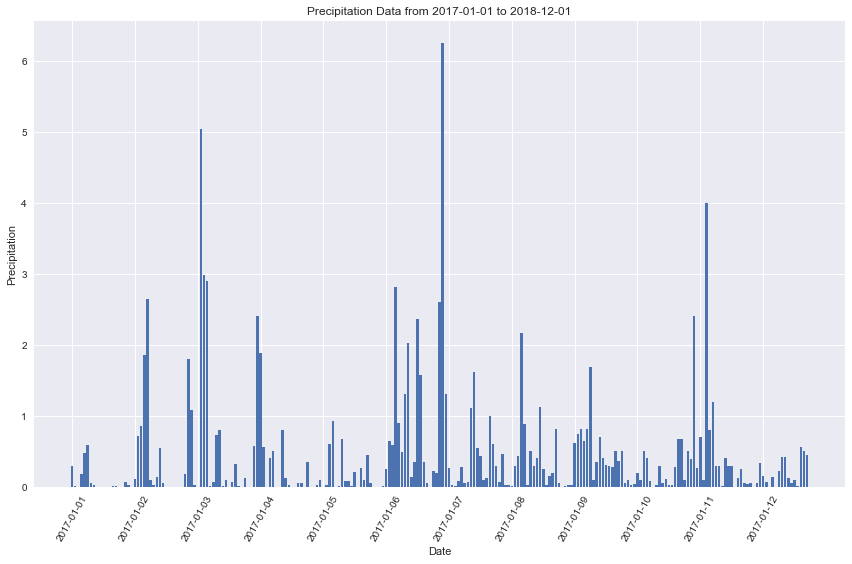

In [136]:
# Create a horizontal bar chart and plot the `date` on the y-axis and the `Precipitation` on the x-axis
plt.figure(figsize=(12,8))
plt.bar(df1.index.values, df1['prcp'])
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title("Precipitation Data from 2017-01-01 to 2018-12-01")
plt.legend(loc='upper left')
plt.legend (loc=2,
           borderaxespad=0.,
           bbox_to_anchor=(1.05, 1),
           fontsize=10,
           title='Precip')
plt.locator_params(axis='x', nbins=12)
plt.xticks(rotation=60)
sns.set()

plt.tight_layout()
plt.show()

In [137]:
# Use Pandas to print the summary statistics for the precipitation data
conn=engine.connect()
data = pd.read_sql("SELECT * FROM measurement", conn)
data["prcp"].describe()


count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [138]:
# Design a query to calculate the total number of stations.
No_of_stations = session.query(Measurement).group_by(Measurement.station).count()
print(No_of_stations)

9


In [139]:
# Design a query to find the most active stations.
# List the stations and observation counts in descending order
#  station has the highest number of observations?
results = session.query(Measurement.station, func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
print(results)
print(results[0])

[('USC00519281', 2772), ('USC00513117', 2696), ('USC00519397', 2685), ('USC00519523', 2572), ('USC00516128', 2484), ('USC00514830', 1937), ('USC00511918', 1932), ('USC00517948', 683), ('USC00518838', 342)]
('USC00519281', 2772)


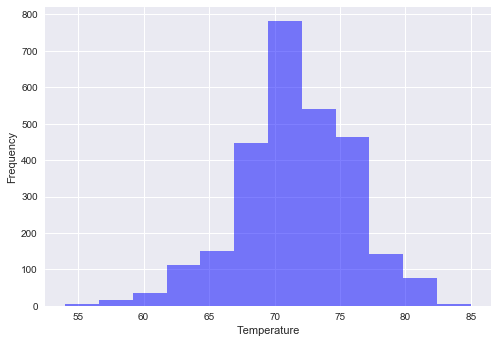

In [140]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.
data = session.query(Measurement.date, Measurement.tobs).filter(and_(Measurement.date >= '2017-01-01', \
        Measurement.date < '2018-01-01')).all()
Highest_no_obs = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()


tobs = [data[1] for data in Highest_no_obs]
fig = plt.figure()

#  data
x = tobs

bins = 12
# the histogram of the data
plt.hist(x, bins, color='blue', alpha=0.5)


plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

In [148]:
# Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d and
# return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(startdate, enddate):
    results=session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                         filter(Measurement.date >= startdate, Measurement.date < enddate).all()
    return results
   
# calc_temps('2017-01-01', '2017-01-08')
calc_temps(startDate, endDate)

[(62, 68.1025641025641, 74)]

In [144]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

from datetime import datetime, timedelta
sDate = datetime.strptime(startDate,"%Y-%m-%d")
eDate = datetime.strptime(endDate,"%Y-%m-%d")
new_startdate = sDate - timedelta(days=365) 
new_endDate = eDate - timedelta(days=365)
calc_temps(new_startdate,new_endDate )



[(62, 70.25, 78)]


[(62, 70.25, 78)]

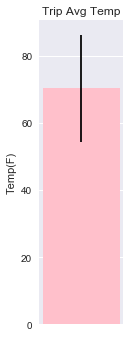

In [145]:
# Plot the min, avg, and max temperature from your previous query as a bar chart.
# Use the average temperature as the bar height.
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

plt.figure(figsize=(2,5))
y=70.25
variance = 78-62

plt.bar(0, y, width,color='pink', yerr=variance)
plt.ylabel("Temp(F)")
plt.title("Trip Avg Temp")

plt.tight_layout()
plt.xticks([])

plt.show()
